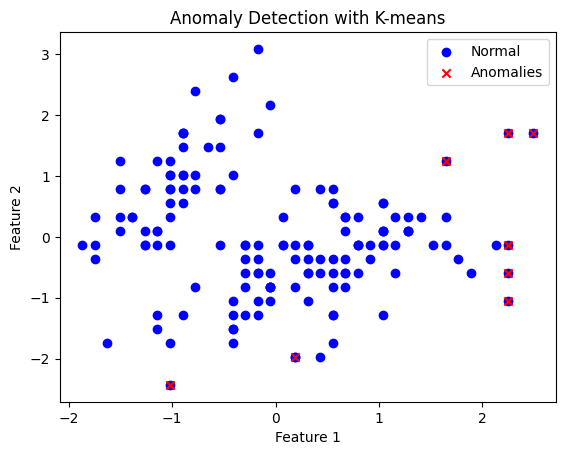

Detected anomalies: [ 60  62 109 117 118 122 131 135]


In [1]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances_argmin_min

data = load_iris()
X = data.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

distances = pairwise_distances_argmin_min(X_scaled, kmeans.cluster_centers_)[1]
threshold = np.percentile(distances, 95)

anomalies = np.where(distances > threshold)[0]

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c='blue', label='Normal')
plt.scatter(X_scaled[anomalies, 0], X_scaled[anomalies, 1], c='red', label='Anomalies', marker='x')
plt.title('Anomaly Detection with K-means')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

print(f"Detected anomalies: {anomalies}")